# **Introduction**

## **Welcome to my Diabetes classification modeling project!**
In this project, I'll be exploring a dataset provided by the National Institute of Diabetes and Digestive and Kidney Diseases, containing numerous features widely associated with diabetes. As someone deeply interested in healthcare and data science, I find this topic particularly compelling.
<br><br>
Developing a classification model for diabetes is essential for several reasons. Firstly, diabetes is a prevalent chronic disease worldwide, with profound health and economic impacts. By accurately predicting diabetes risk, we can empower healthcare professionals to identify individuals who may benefit from preventive interventions, lifestyle modifications, or early treatment. This can significantly reduce the likelihood of developing complications associated with diabetes, such as cardiovascular disease, kidney disease, and neuropathy.
<br><br>
In this project, I have two main objectives: initially, I will conduct exploratory data analysis and statistical analysis on this dataset to understand its distribution and gain valuable insights. Then, I will determine the best-performing machine learning algorithm and develop the best model by fine-tuning its hyperparameters. Selecting the right algorithm for building a classification model is crucial for achieving the highest possible accuracy. Once the best model is established, I will explore the associated scoring metrics and investigate which features contribute the most to determining whether a person has diabetes.
<br><br>

Here's the description about the the dataset:
- Pregmancies : Number of times pregnant
- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Blood Pressure : Diastolic blood pressure (mm Hg)
- Skin Thickness : Triceps skin fold thickness (mm)
- Insulin : 2-Hour serum insulin (mu U/ml)
- BMI : Body mass index (weight in kg/(height in m)^2)
- Diabetes Pedigree Function : function that scores the probability of diabetes based on family history, with a realistic range of 0.08 to 2.42.
- Age : Age (years)
- Outcome : Diabetes (0 = No, 1 = Yes)
- all patients in the dataset are females at least 21 years old
<br><br>

More details can be found at [National Institute of Diabetes](https://www.niddk.nih.gov/health-information/diabetes)

## **Importing Libraries**


In this section, essential libraries are imported to enable data analysis, visualization, and modeling. Pandas is utilized for data manipulation, NumPy for numerical operations, Seaborn and Matplotlib for visualization, Statsmodels for statistical modeling, and various modules from Scikit-learn for machine learning tasks.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, recall_score, f1_score, precision_score, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier , ExtraTreesClassifier
from xgboost import XGBClassifier
plt.style.use("ggplot")
%matplotlib inline

## **Data Overview**

The dataset is loaded into a Pandas DataFrame, and initial exploration is conducted. The structure of the dataset is examined, checking for missing values and visualizing the distribution of the target variable using bar plots and pie charts to understand the class distribution.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

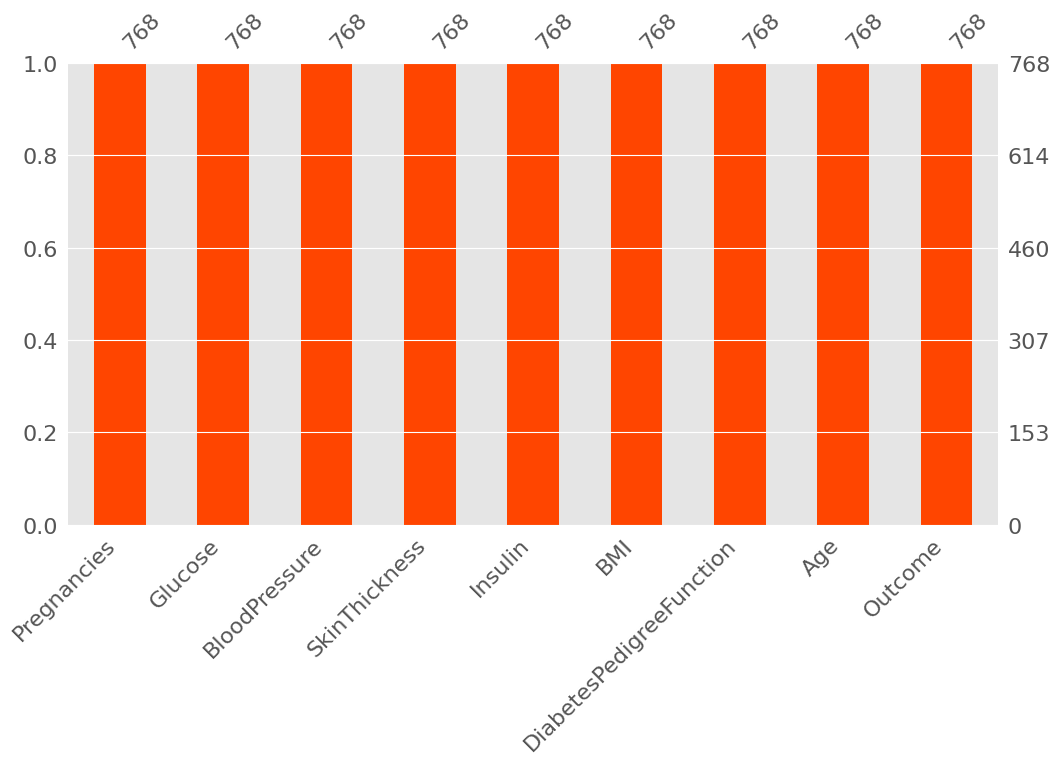

In [ ]:
msno.bar(df, color = 'orangered' , figsize = (12,6))

The missingno plot visualization indicates that there is no missing data in the dataset.

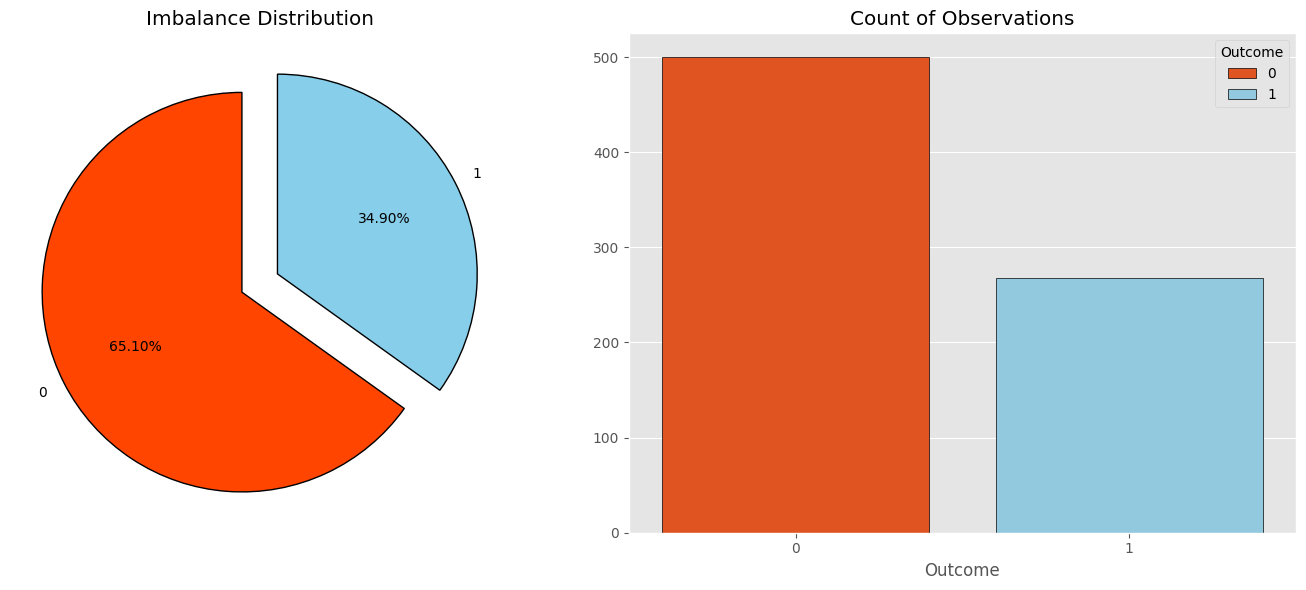

In [ ]:
label_counts = df['Outcome'].value_counts()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(label_counts, labels=label_counts.index, autopct='%1.2f%%', startangle=90, colors=['orangered', 'skyblue'], explode=(0.1, 0.1), wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Imbalance Distribution')

plt.subplot(1, 2, 2)
sns.barplot(x=label_counts.index, y=label_counts.values, palette = ['orangered', 'skyblue'] , hue = label_counts.index , edgecolor='black')
plt.title('Count of Observations')

plt.tight_layout()
plt.show()

The dataset exhibits class imbalance, with 65.10% of the samples without diabetes and 34.9% with diabetes.

## **Univariate Analysis**

This section focuses on analyzing individual features one by one. Histograms for each feature are plotted to provide insights into their distributions and potential outliers.

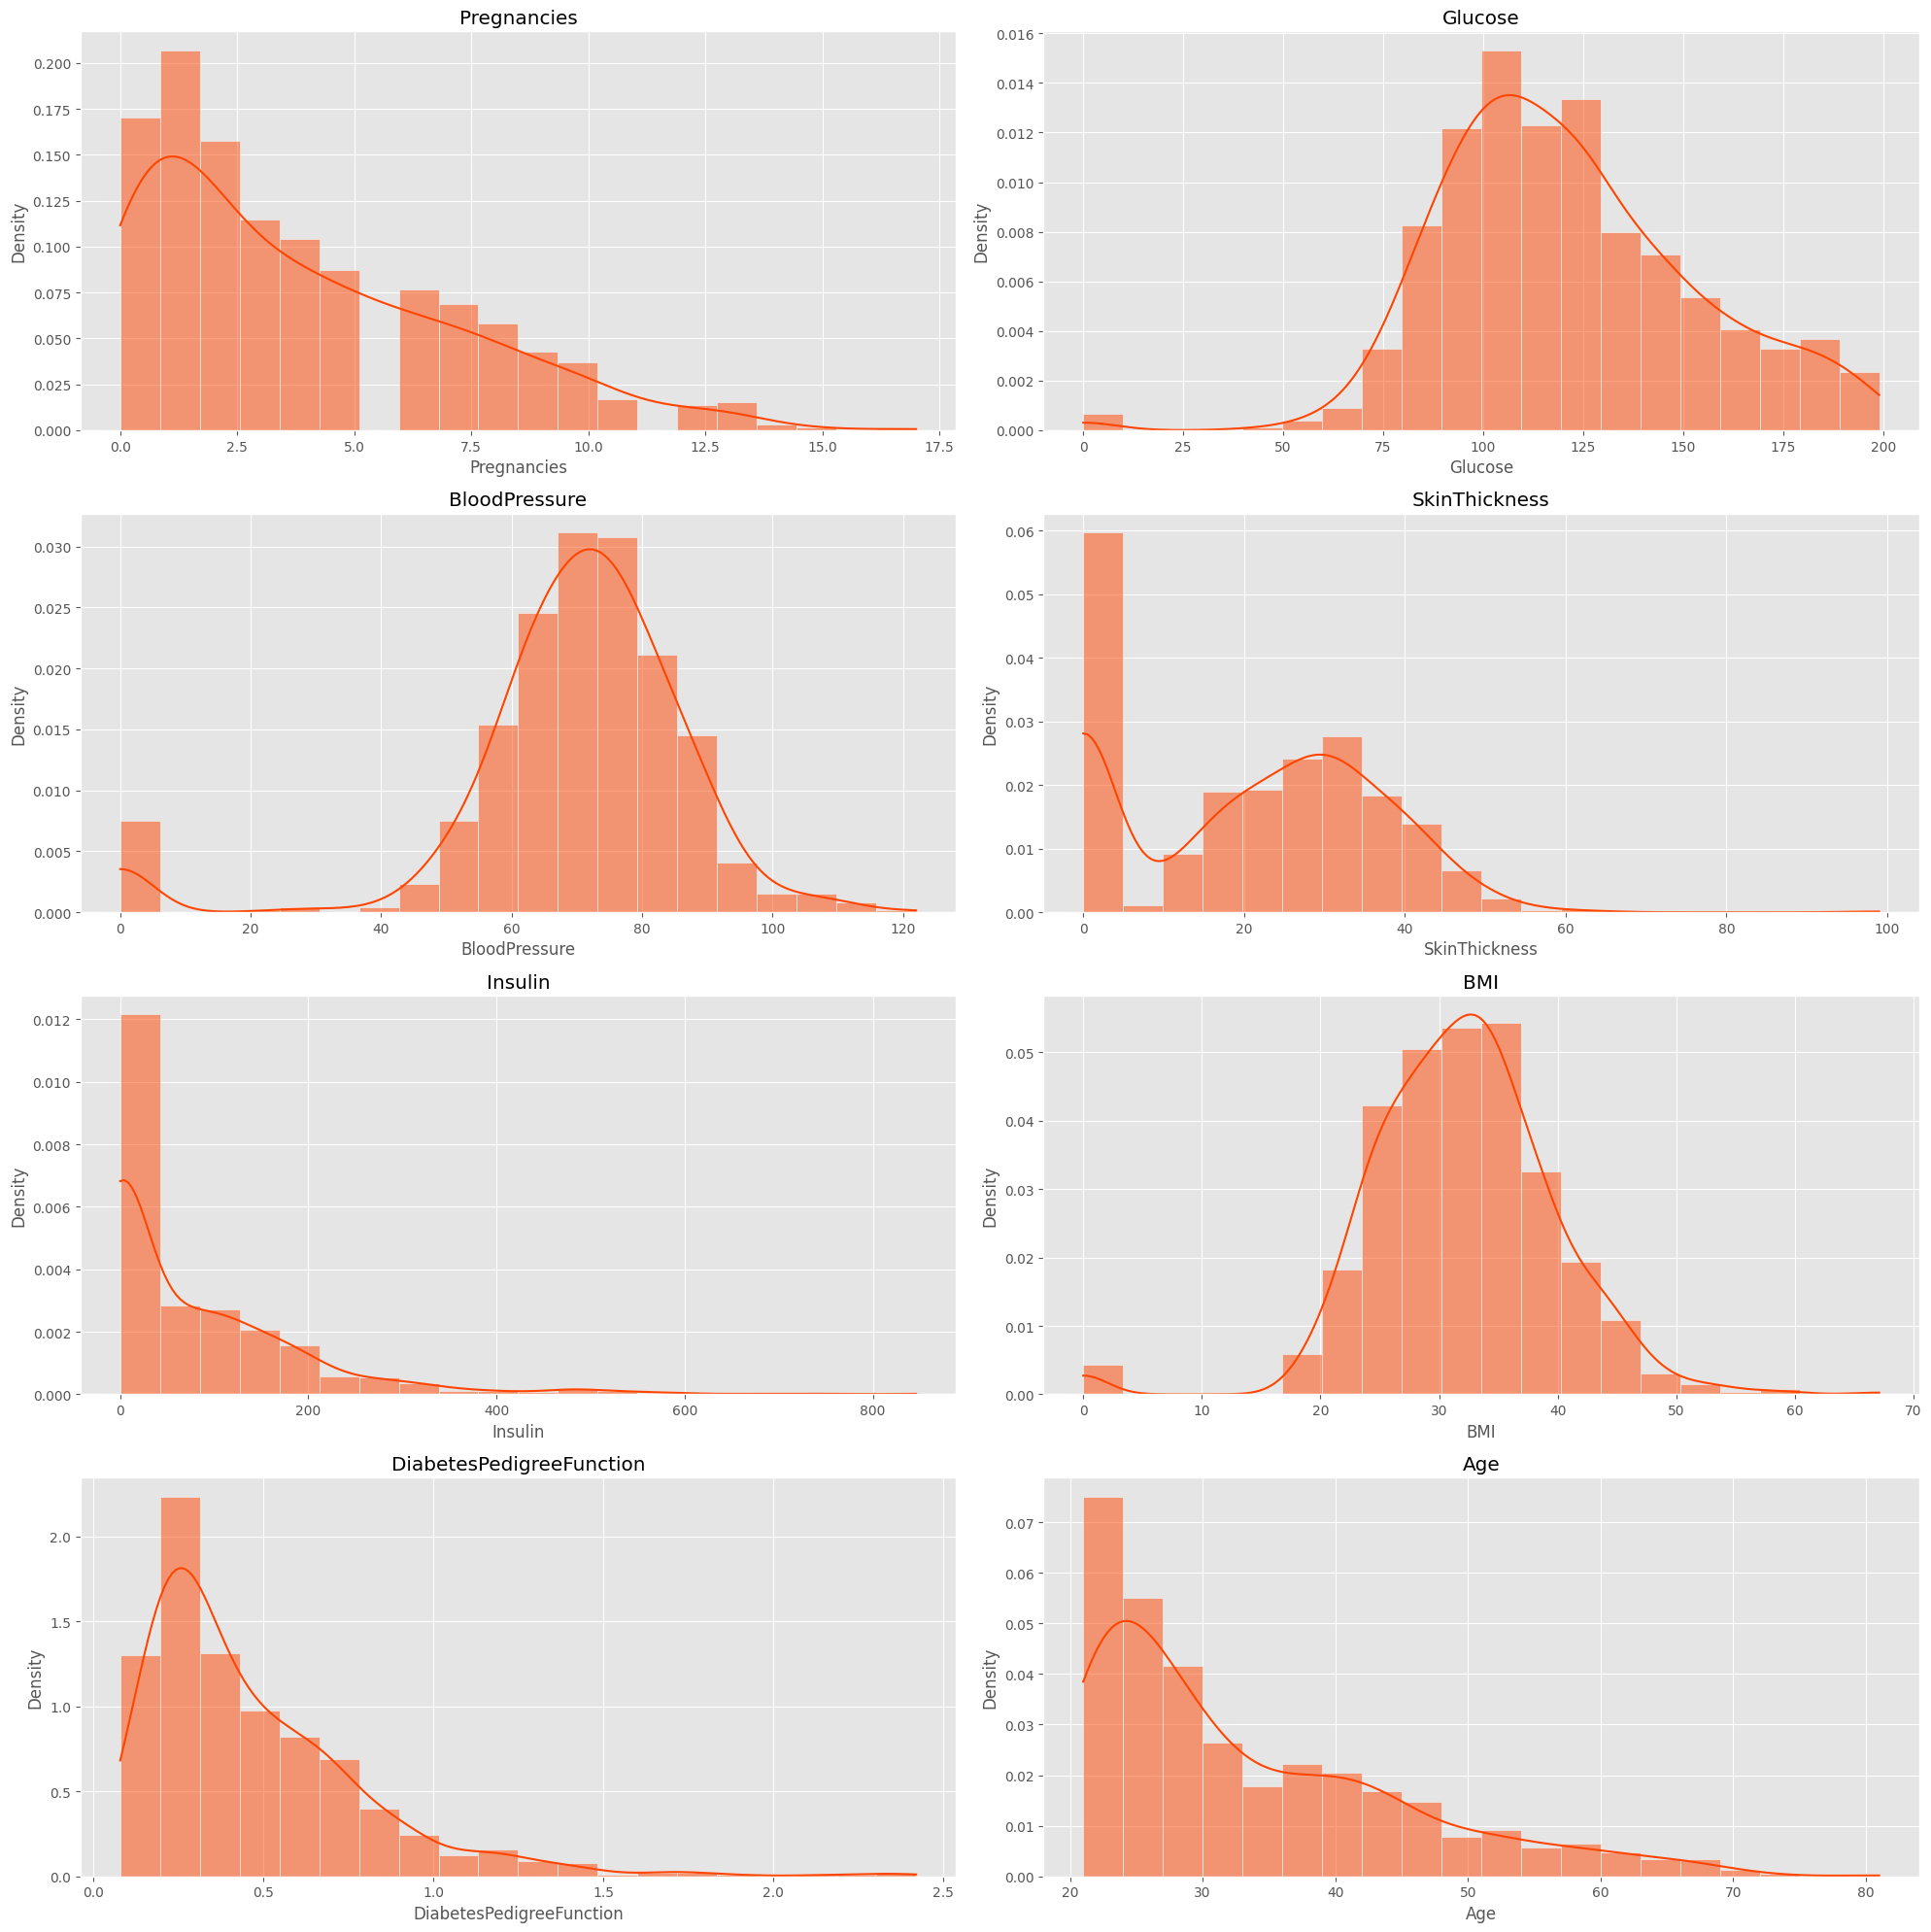

In [ ]:
def univariate_distplots(df, columns, bins=20, color="orangered", figsize=(20,20)):
    fig, ax = plt.subplots(4, 2, figsize=figsize)

    for i, column in enumerate(columns):
        sns.histplot(df[column], bins=bins, ax=ax[i//2, i%2], kde = True, stat = 'density' , color='orangered')
        ax[i//2, i%2].set_title(column)

    plt.tight_layout()
    plt.show()

df_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

univariate_distplots(df, df_columns)

The distributions for BMI and Blood Pressure appear to be approximately normal, while the distributions of other features are right-skewed. Additionally, there are a significant number feature values that are zeroes in the dataset.

## **Bivariate Analysis**

Here, the relationships between each feature and the Diabetes (Outcome) are explored. Kernel Density Estimation (KDE) plots are used to compare feature distributions for each diabetes class, revealing insights into how features vary between diabetic and non-diabetic individuals.

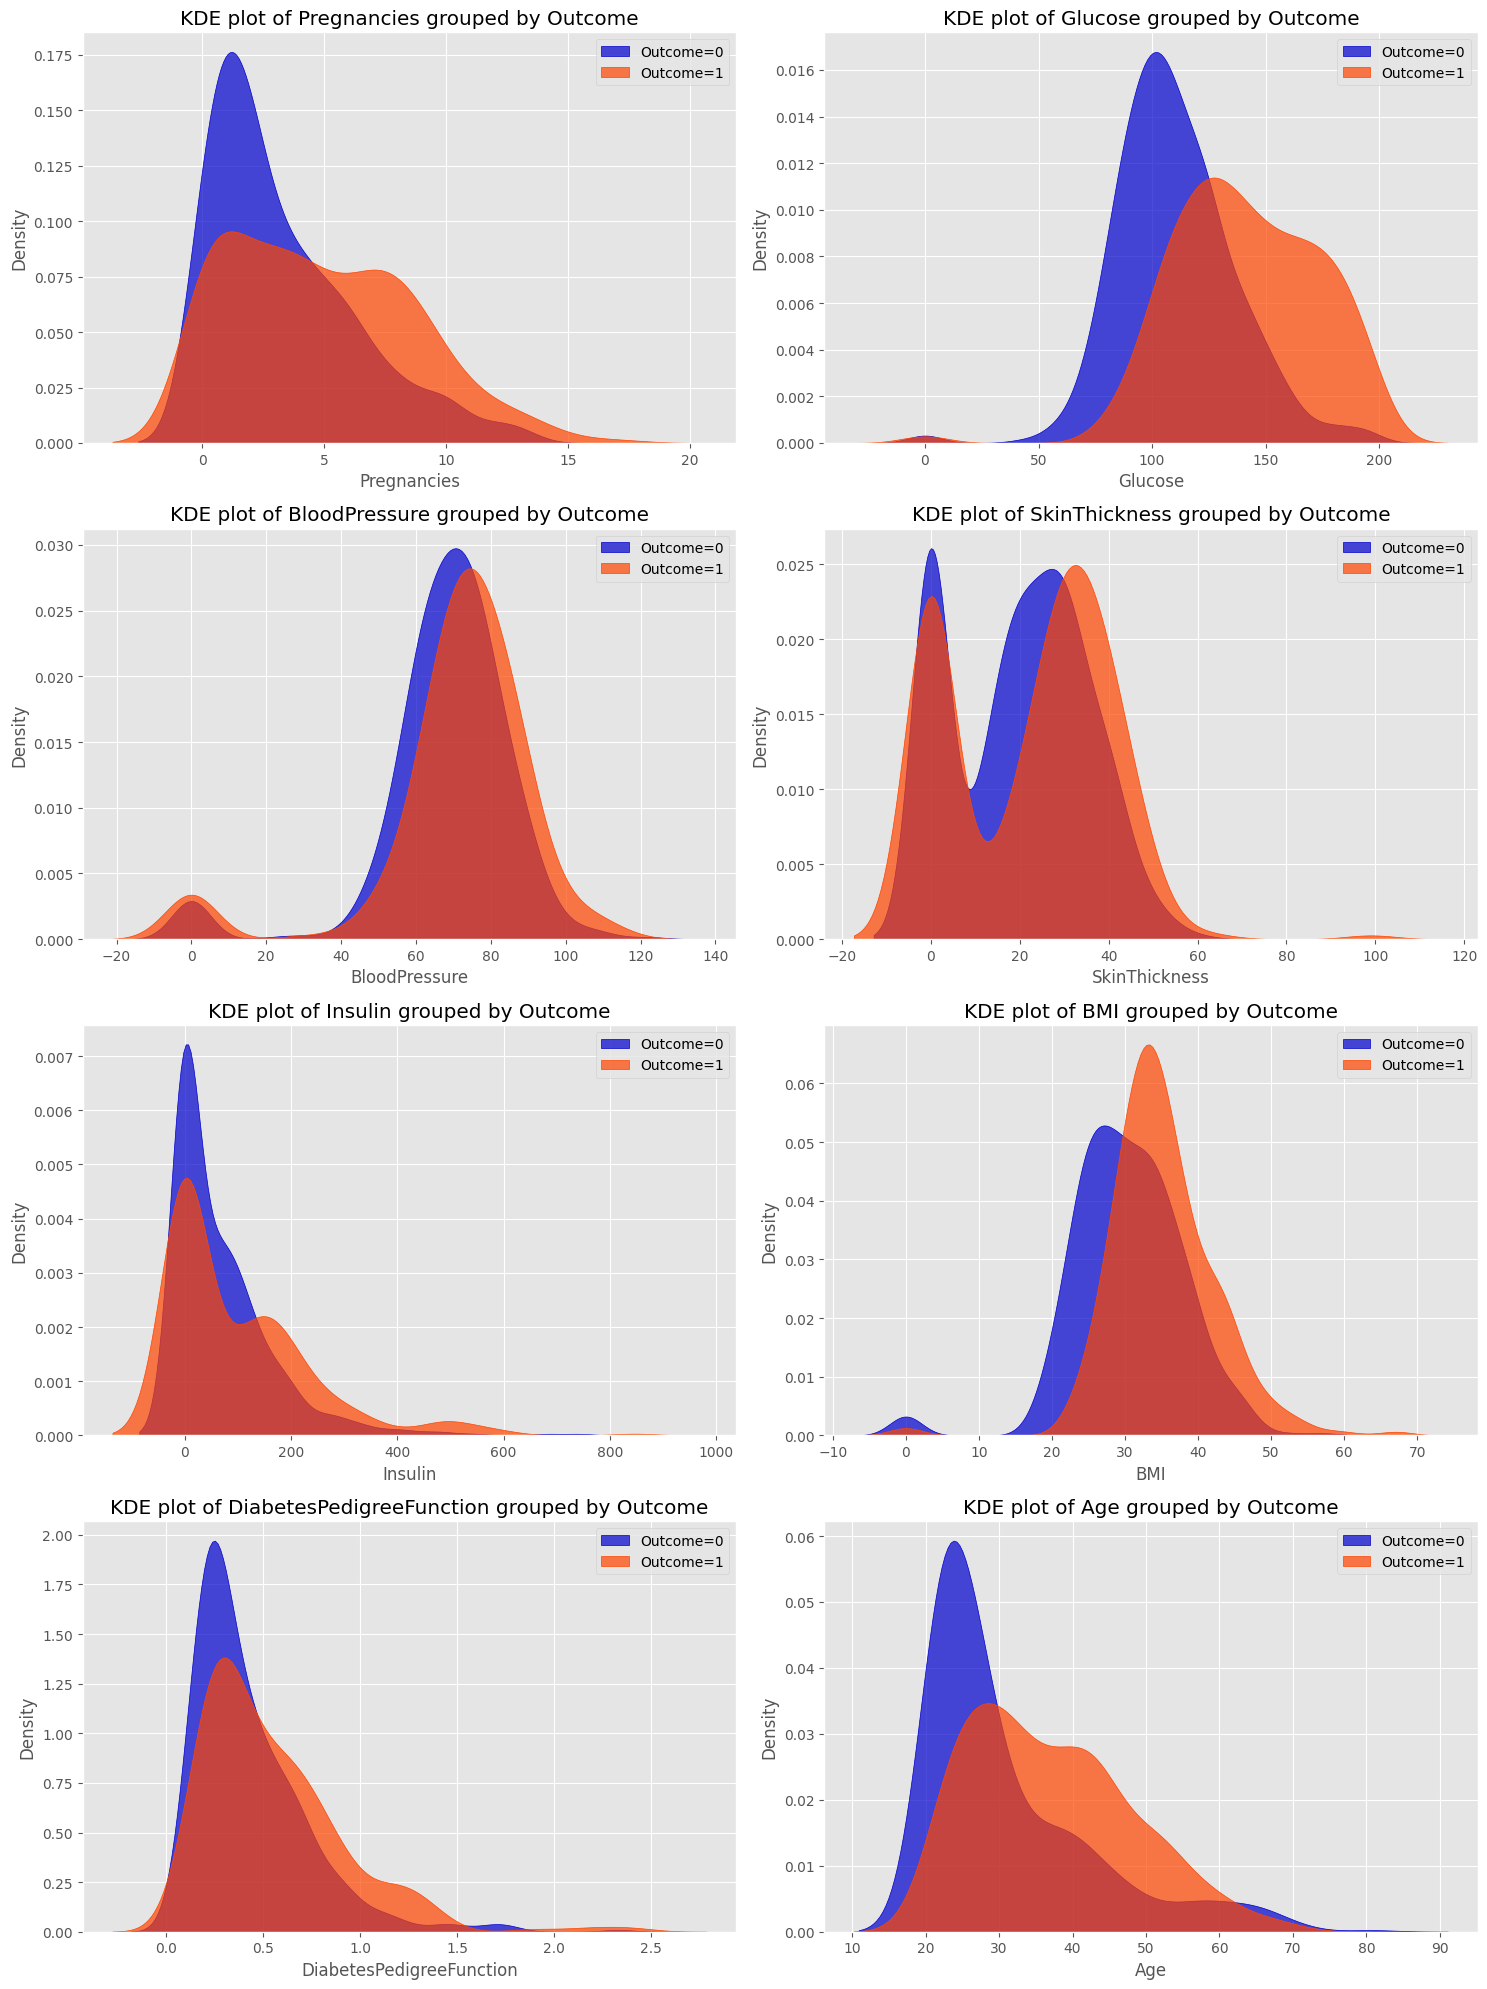

In [ ]:
num_columns = len(df.columns) - 1
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(15, 5*num_rows))

for i in range(num_columns):
    column = df.columns[i]
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['Outcome'] == 0][column], label='Outcome=0', fill=True, color='mediumblue', alpha=0.7)
    sns.kdeplot(data=df[df['Outcome'] == 1][column], label='Outcome=1', fill=True, color='orangered', alpha=0.7)
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()

plt.tight_layout()
plt.show()

The distribution of Age, Glucose level, BMI are more right-centered for people with diabetes compared to people without diabetes. Also, the other features are similarly distributed for the two groups, which means that they are not significantly associated.

## **Two Sample T-Test**

This section is two-sample t-tests to determine if there's a statistically significant difference in the mean BMI (Body Mass Index) and Age between women with and without diabetes. This analysis helps understand the association between diabetes status and BMI among women in the dataset.

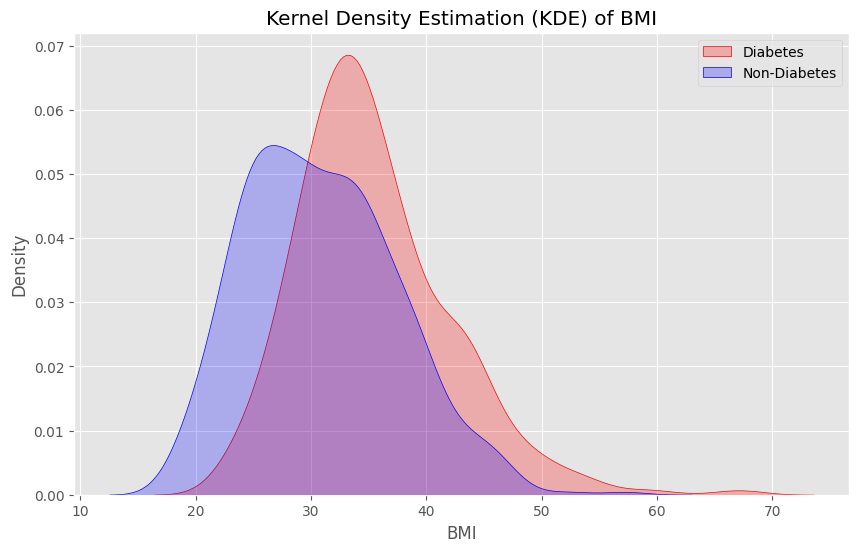

T-statistic: 9.07722131205247
P-value: 9.545638087577825e-19
There is a statistically significant difference in mean BMI between women with diabetes and those without diabetes.
Women with diabetes have higher mean BMI.


In [ ]:
diabetes_BMI = df[(df['Outcome'] == True) & (df['BMI']> 0)]['BMI']
non_diabetes_BMI = df[(df['Outcome'] == False) & (df['BMI']> 0)]['BMI']

plt.figure(figsize=(10, 6))
sns.kdeplot(diabetes_BMI, color="r", fill=True, label="Diabetes")
sns.kdeplot(non_diabetes_BMI, color="b", fill=True, label="Non-Diabetes")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.title("Kernel Density Estimation (KDE) of BMI")
plt.legend()
plt.show()

t_statistic, p_value = stats.ttest_ind(diabetes_BMI, non_diabetes_BMI)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in mean BMI between women with diabetes and those without diabetes.")
    if t_statistic > 0:
        print("Women with diabetes have higher mean BMI.")
    else:
        print("Women without diabetes have higher mean BMI.")
else:
    print("There is no statistically significant difference in mean BMI between women with diabetes and those without diabetes.")

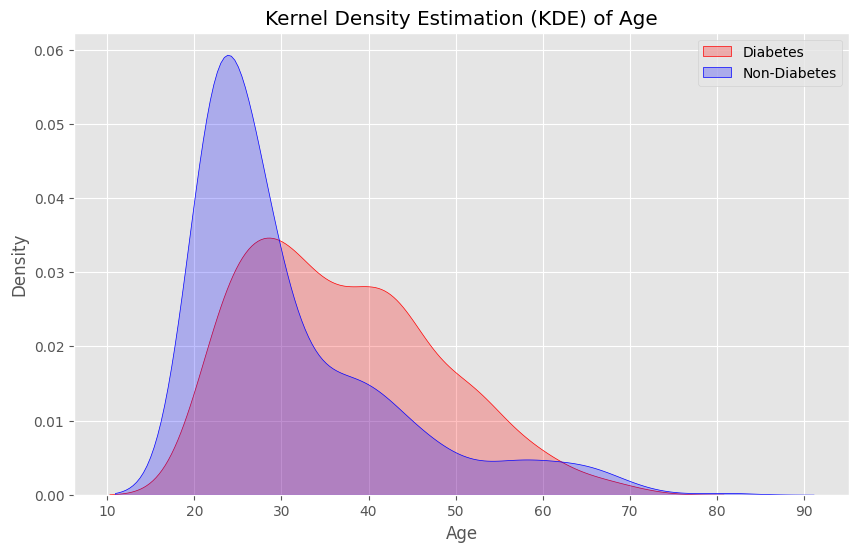

T-statistic: 6.792688071649956
P-value: 2.2099754606654358e-11
There is a statistically significant difference in mean Age between women with diabetes and those without diabetes.
Women with diabetes have higher mean Age.


In [ ]:
diabetes_age = df[(df['Outcome'] == True) & (df['Age']> 0)]['Age']
non_diabetes_age = df[(df['Outcome'] == False) & (df['Age']> 0)]['Age']

plt.figure(figsize=(10, 6))
sns.kdeplot(diabetes_age, color="r", fill=True, label="Diabetes")
sns.kdeplot(non_diabetes_age, color="b", fill=True, label="Non-Diabetes")
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Kernel Density Estimation (KDE) of Age")
plt.legend()
plt.show()

t_statistic, p_value = stats.ttest_ind(diabetes_age, non_diabetes_age)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in mean Age between women with diabetes and those without diabetes.")
    if t_statistic > 0:
        print("Women with diabetes have higher mean Age.")
    else:
        print("Women without diabetes have higher mean Age.")
else:
    print("There is no statistically significant difference in mean Age between women with diabetes and those without diabetes.")


## **Correlations**

Visualizing correlations between features using a heatmap provides insights into potential multicollinearity issues. Pairplot is are also used to visualize feature distributions and scatter plots to explore pairwise relationships, aiding in understanding the dataset's structure.

Text(0.5, 1.0, 'Correlation Heatmap')

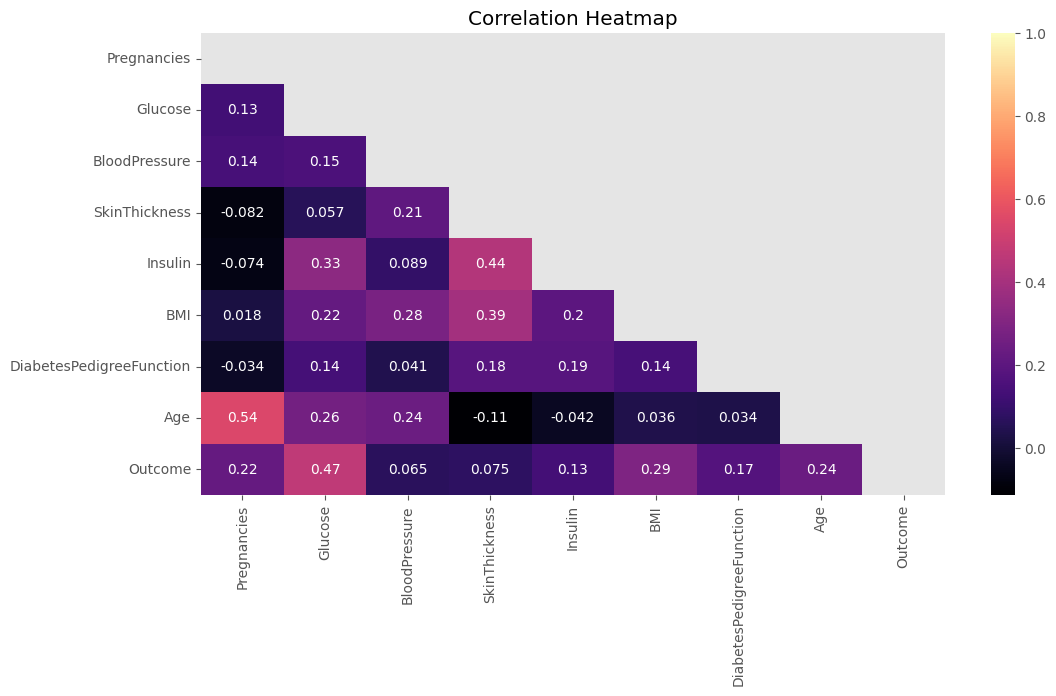

In [ ]:
plt.figure(figsize=(12,6))
plt.grid(False)
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, vmax = 1 , cmap='magma')
heatmap.set_title('Correlation Heatmap')

The correlation value of 0.47 between the Outcome (Diabetes) and Glucose indicates a relatively strong positive association compared to other features. It's also interesting to note that insulin and skin thickness also have a moderate positive association.

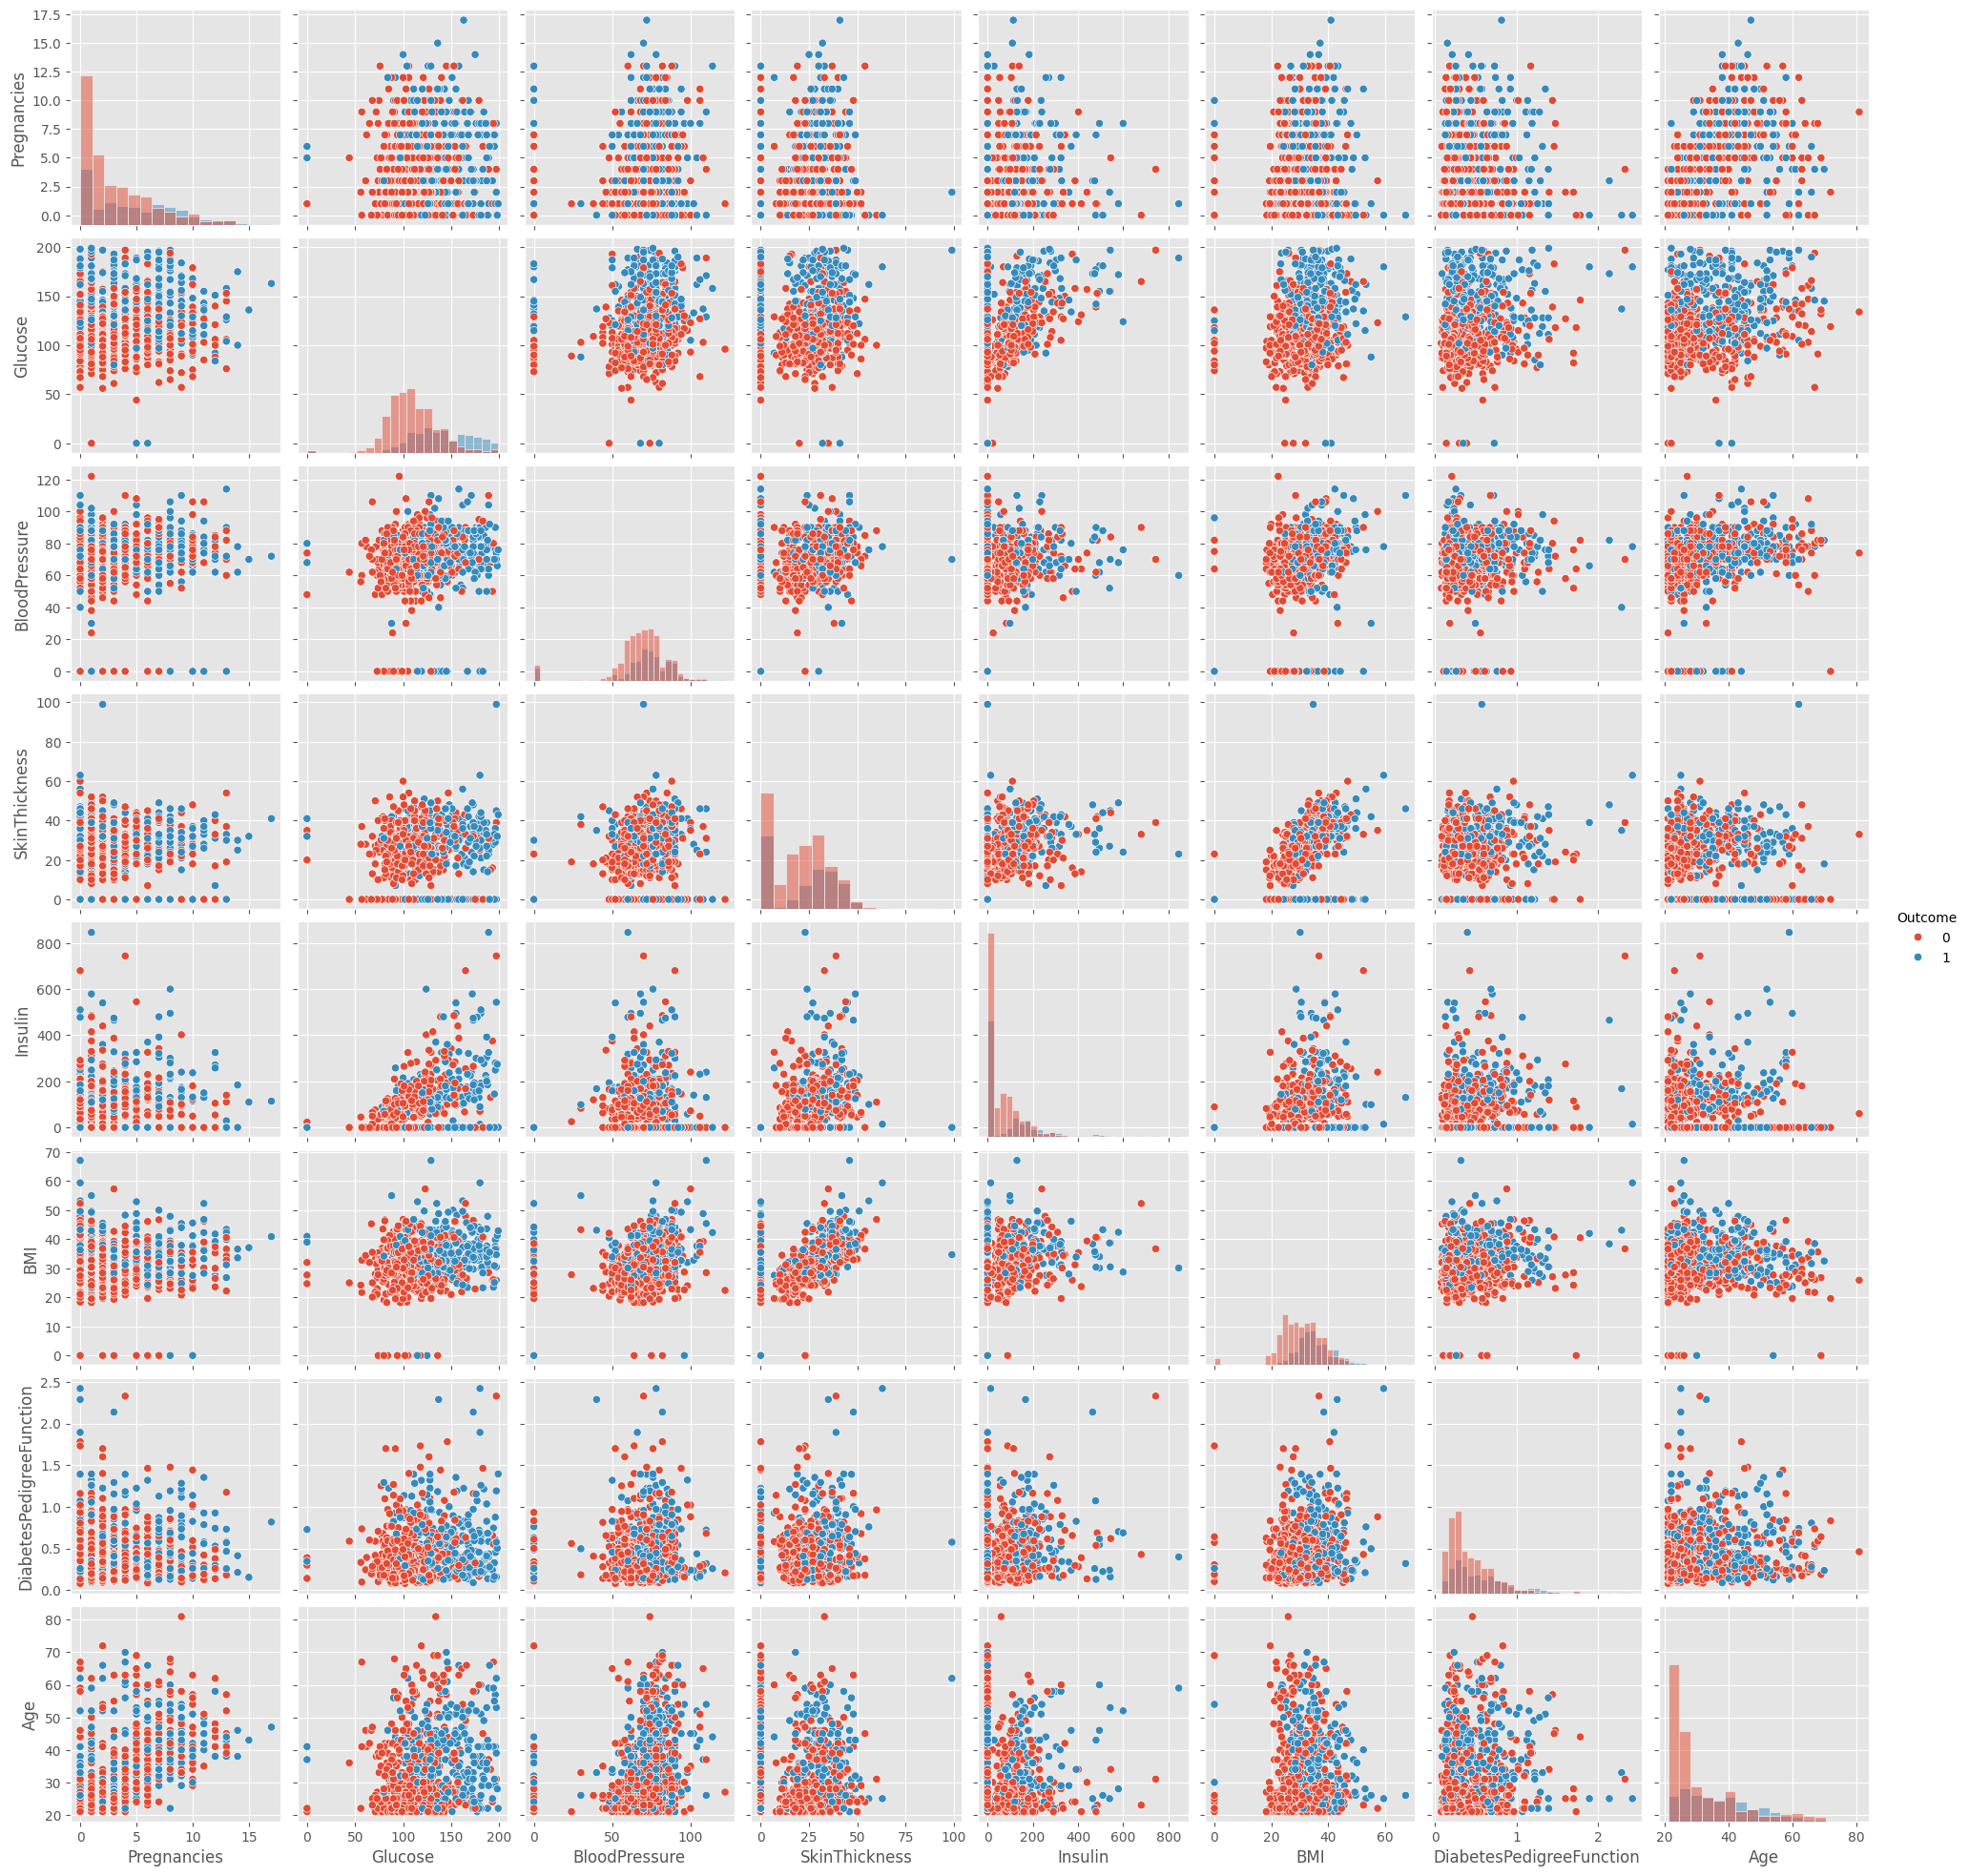

In [ ]:
sns.pairplot(df, diag_kind = 'hist', hue='Outcome')

As discussed earlier, many data points have feature values of zero. Specifically, the zero values for Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI are unrealistic and may indicate dangerous or unlikely medical conditions.

## **Data Imputation / Outlier Investigation**

 In this section, we address the issue of zero values in the dataset, which could be indicative of missing data or unrealistic entries. After imputing missing values, we visually inspect the data for outliers using boxplots. This process ensures that the data is prepared for subsequent modeling and analysis.

In [ ]:
df1 = df.copy()
zero_counts = df1[df1.columns].eq(0).sum()

print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [ ]:
columns_to_replace = ['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI']

df1[columns_to_replace] = df1[columns_to_replace].replace(0, pd.NA)

for column in columns_to_replace :
  median_value = df1[column].median()
  df1[column].fillna(median_value , inplace = True)

updated_zero_counts = df1[df1.columns].eq(0).sum()

print(updated_zero_counts)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Here, I replaced all of the zero values with the median value of the column, except for the Pregnancies column, as a zero value for pregnancies is common.

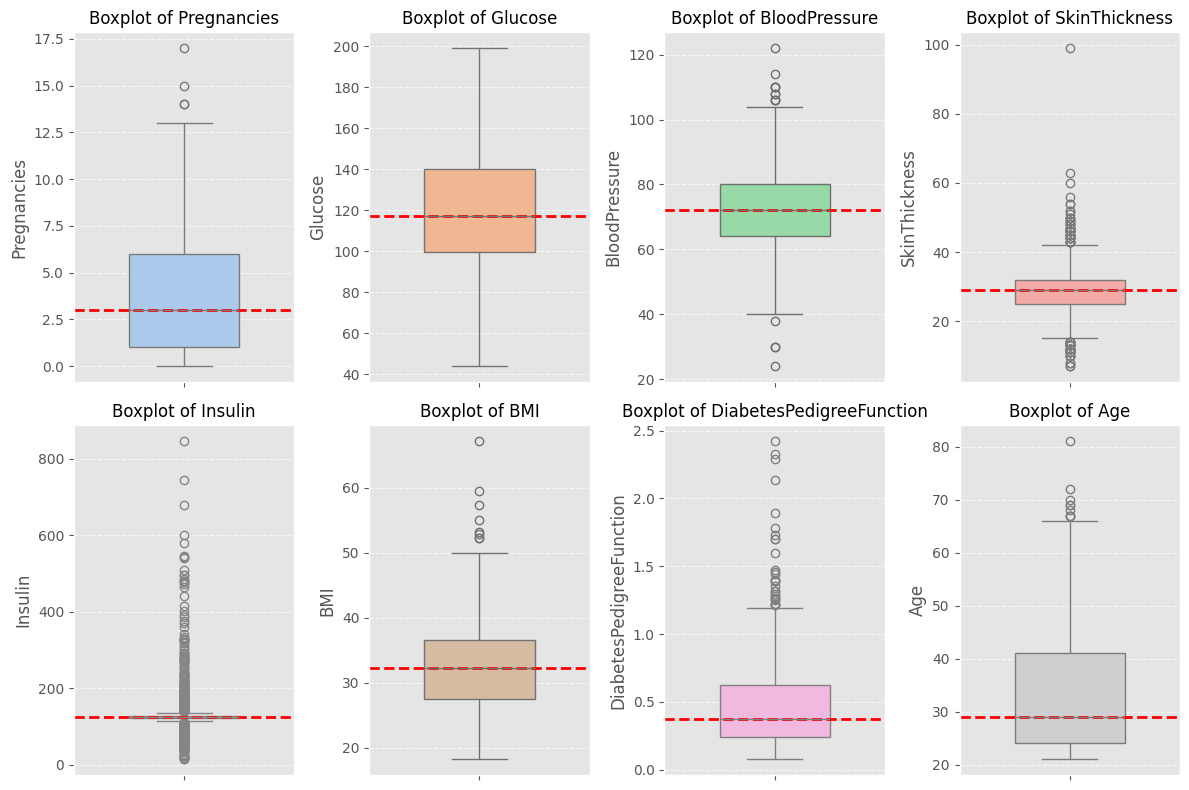

In [ ]:
X_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

palette = sns.color_palette('pastel')

plt.figure(figsize=(12, 8))
for i, column in enumerate(X_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df1[column], color=palette[i-1], width=0.5)
    plt.axhline(y=df1[column].median(), color='red', linestyle='--', linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

The boxplot of Insulin indicates that 50% of all samples have an Insulin value of about 100. Additionally, the 50th percentile (median) of BMI for the dataset is 32, suggesting that a significant portion of the samples are overweight.

In [ ]:
def outlier_cnt(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for feature in X_cols:
    num_outliers = outlier_cnt(df1[feature])
    print(f'Number of outliers in {feature}: {num_outliers}')

Number of outliers in Pregnancies: 4
Number of outliers in Glucose: 0
Number of outliers in BloodPressure: 14
Number of outliers in SkinThickness: 87
Number of outliers in Insulin: 346
Number of outliers in BMI: 8
Number of outliers in DiabetesPedigreeFunction: 29
Number of outliers in Age: 9


## **Data Preprocessing**

Here, I have implemented data normalization to balance the impact of all features and improve the performance of the algorithm. After normalization, the imbalance in the sizes of the diabetic and non-diabetic groups is addressed using Synthetic Minority Oversampling Technique (SMOTE). By oversampling the minority class (diabetic group), we increase its representation in the dataset, thereby improving the model's ability to learn from it and reducing the risk of bias towards the majority class.

In [ ]:
robust_scaler = RobustScaler()
df1[X_cols] = robust_scaler.fit_transform(df1[X_cols])
standard_scaler = StandardScaler()
df1[X_cols] = standard_scaler.fit_transform(df1[X_cols])

In [ ]:
from imblearn.over_sampling import SMOTE

X = df1.drop(['Outcome'], axis=1)
y = df1['Outcome']

scaler = MinMaxScaler(feature_range=(0, 1))

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


In [ ]:
X_resampled.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1000.0,0.238575,0.200809,0.0,0.058824,0.176471,0.367203,1.0
Glucose,1000.0,0.530606,0.199123,0.0,0.380645,0.503226,0.658311,1.0
BloodPressure,1000.0,0.497614,0.118097,0.0,0.428571,0.489796,0.571429,1.0
SkinThickness,1000.0,0.246582,0.091589,0.0,0.209757,0.239130,0.282609,1.0
Insulin,1000.0,0.157570,0.102546,0.0,0.133413,0.133413,0.153075,1.0
BMI,1000.0,0.304304,0.136400,0.0,0.210549,0.298569,0.388167,1.0
DiabetesPedigreeFunction,1000.0,0.174736,0.141191,0.0,0.075149,0.133646,0.245738,1.0
Age,1000.0,0.216179,0.189633,0.0,0.066667,0.166667,0.333333,1.0



The final processed dataset contains 1000 samples, with 500 samples in each of the diabetic and non-diabetic groups.

# **Modeling**

In this section, I build and evaluate multiple machine learning models to predict diabetes. First, the dataset is split into training and testing sets. Then, various classifiers are trained and evaluated, including Logistic Regression, Support Vector Classifier (SVC), Random Forest Classifier, K-Neighbors Classifier, Extra Trees Classifier, and XGBoost Classifier. Hyperparameter tuning is performed for each algorithm to find the optimized model. This allows for a comprehensive comparison of the models.

## **Train-Test Split**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_resampled , y_resampled , test_size = 0.2 , random_state = 42)

The dataset is split into training and testing sets, with 80% of the samples allocated for training and 20% for testing. This division ensures that the model is trained on a sufficient amount of data to learn patterns and relationships while also having unseen data to evaluate its performance and generalization ability.

## **Logistic Regression Classifier**

Logistic Regression is a widely used classification algorithm that models the probability of a binary outcome based on one or more predictor variables. In this context, it's fitting for predicting the likelihood of diabetes given patient features.

In [ ]:
lr = LogisticRegression()

param_grid_lr = {
    'penalty' : ['l2'],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
}

randomized_search_lr = RandomizedSearchCV(
    lr,
    param_distributions = param_grid_lr,
    n_iter = 15,
    cv = 5,
    scoring = 'accuracy',
    random_state = 42,
    n_jobs = -1
)

randomized_search_lr.fit(X_train , y_train)

best_lr_model = randomized_search_lr.best_estimator_
lr_pred = best_lr_model.predict(X_test)

lr_acc = accuracy_score(y_test , lr_pred)
lr_conf_matrix = confusion_matrix(y_test, lr_pred)

print(f"Best Hyperparameters : {randomized_search_lr.best_params_}")
print("\nConfusion Matrix:")
print(lr_conf_matrix)
print("\nAccuracy of Logistic Regression Classifier:", lr_acc * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, lr_pred))

Best Hyperparameters : {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 5000}

Confusion Matrix:
[[71 28]
 [22 79]]

Accuracy of Logistic Regression Classifier: 75.0 

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        99
           1       0.74      0.78      0.76       101

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



## **Support Vector Classifier**

The Support Vector Classifier (SVC) is a powerful classification algorithm designed to find the optimal hyperplane that separates different classes in a high-dimensional space.

In [ ]:
#SVC_model = SVC(random_state = 42).fit(X_train , y_train)
#y_pred_SVC = SVC_model.predict(X_test)
svc = SVC()

param_grid_svc = {
    'kernel' : ['linear' , 'rbf' , 'poly'],
    'C' : [0.1 , 1 , 10 , 100, 100],
    'gamma' : ['scale' , 'auto' , 0.001 , 0.01 , 0.1 , 1]
}

randomized_search_svc = RandomizedSearchCV(
    svc,
    param_distributions = param_grid_svc,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_svc.fit(X_train, y_train)

best_svc_model = randomized_search_svc.best_estimator_
svc_pred = best_svc_model.predict(X_test)

svc_acc = accuracy_score(y_test, svc_pred)
svc_conf_matrix = confusion_matrix(y_test, svc_pred)

print(f"Best Hyperparameters : {randomized_search_svc.best_params_}")
print("\nConfusion Matrix:")
print(svc_conf_matrix)
print("\nAccuracy of Support Vector Classifier:", svc_acc * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, svc_pred))

Best Hyperparameters : {'kernel': 'rbf', 'gamma': 1, 'C': 100}

Confusion Matrix:
[[68 31]
 [16 85]]

Accuracy of Support Vector Classifier: 76.5 

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.74        99
           1       0.73      0.84      0.78       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



## **Random Forest Classifier**

The Random Forest Classifier is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes as the prediction. It's particularly useful for handling large datasets with high dimensionality.

In [ ]:
# Random Forest Classifier Model Training
rf = RandomForestClassifier()

param_grid_rf = {
    'n_estimators' : [50 , 100 , 200],
    'max_features' : ['sqrt'],
    'max_depth' : [10 , 40 , 60 , 80 , None],
    'min_samples_leaf' : [1 , 2 , 4 , 8],
    'bootstrap' : [True, False]
}

randomized_search_rf = RandomizedSearchCV(
    rf,
    param_distributions = param_grid_rf,
    n_iter = 15,
    cv = 5,
    scoring = 'accuracy',
    random_state = 42,
    n_jobs = -1
)

randomized_search_rf.fit(X_train , y_train)

best_rf_model = randomized_search_rf.best_estimator_
rf_pred = best_rf_model.predict(X_test)

rf_acc = accuracy_score(y_test , rf_pred)
rf_conf_matrix = confusion_matrix(y_test , rf_pred)

print(f"Best Hyperparameters : {randomized_search_rf.best_params_}")
print("\nConfusion Matrix:")
print(rf_conf_matrix)
print("\nAccuracy of Random Forest Classifier:", rf_acc * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, rf_pred))

Best Hyperparameters : {'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

Confusion Matrix:
[[74 25]
 [15 86]]

Accuracy of Random Forest Classifier: 80.0 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        99
           1       0.77      0.85      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



## **K-Neighbors Classifier**

The K-Neighbors Classifier is a simple yet effective algorithm that classifies samples based on the majority class among their k nearest neighbors. It's suitable for this dataset, which involves predicting diabetes status based on similar cases.

In [ ]:
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors' : [5,7,9,11,13,15],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [10, 20, 30, 40]
}

randomized_search_knn = RandomizedSearchCV(
    knn,
    param_distributions = param_grid_knn,
    n_iter = 15,
    cv = 5,
    scoring = 'accuracy',
    random_state = 42,
    n_jobs = -1
)

randomized_search_knn.fit(X_train , y_train)

best_knn_model = randomized_search_knn.best_estimator_
knn_pred = best_knn_model.predict(X_test)

knn_acc = accuracy_score(y_test , knn_pred)
knn_conf_matrix = confusion_matrix(y_test , knn_pred)

print(f"Best Hyperparameters : {randomized_search_knn.best_params_}")
print("\nConfusion Matrix:")
print(knn_conf_matrix)
print("\nAccuracy of K-Neighbors Classifier:", knn_acc * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, knn_pred))

Best Hyperparameters : {'weights': 'distance', 'n_neighbors': 7, 'metric': 'euclidean', 'leaf_size': 10, 'algorithm': 'brute'}

Confusion Matrix:
[[66 33]
 [ 6 95]]

Accuracy of K-Neighbors Classifier: 80.5 

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.77        99
           1       0.74      0.94      0.83       101

    accuracy                           0.81       200
   macro avg       0.83      0.80      0.80       200
weighted avg       0.83      0.81      0.80       200



## **Extra Trees Classifier**

The Extra Trees Classifier is an ensemble learning method similar to Random Forests but with a higher level of randomness. It constructs multiple decision trees and outputs the mode of the classes as the prediction.

In [ ]:
et = ExtraTreesClassifier(random_state = 30)

param_grid_et = {
    'n_estimators': [50, 200, 300, 500],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

randomized_search_et = RandomizedSearchCV(
    et,
    param_distributions = param_grid_et,
    n_iter = 100,
    cv = 5,
    scoring = 'accuracy',
    random_state = 42,
    n_jobs = -1
)

randomized_search_et.fit(X_train , y_train)

best_et_model = randomized_search_et.best_estimator_
et_pred = best_et_model.predict(X_test)

et_acc = accuracy_score(y_test , et_pred)
et_conf_matrix = confusion_matrix(y_test , et_pred)

print(f"Best Hyperparameters : {randomized_search_et.best_params_}")
print("\nConfusion Matrix:")
print(et_conf_matrix)
print("\nAccuracy of Extra Trees Classifier:", et_acc * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, et_pred))

Best Hyperparameters : {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}

Confusion Matrix:
[[77 22]
 [ 9 92]]

Accuracy of Extra Trees Classifier: 84.5 

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83        99
           1       0.81      0.91      0.86       101

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



## **XGBoost Classifier**

The XGBoost Classifier, an extension of gradient boosting, is preferred over Random Forest or Extra-Trees classifiers due to its sequential nature in building multiple weak learners. Unlike Random Forest, which builds trees in parallel, XGBoost builds trees sequentially, learning from the errors of the previous trees. This sequential approach often results in better predictive performance and reduced overfitting.

In [ ]:
xgb = XGBClassifier()
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [1, 1.1, 1.2, 1.3],
}

randomized_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions = param_grid_xgb,
    n_iter = 15,
    cv = 5,
    scoring = 'accuracy',
    random_state = 42,
    n_jobs = -1
)

randomized_search_xgb.fit(X_train , y_train)

best_xgb_model = randomized_search_xgb.best_estimator_
xgb_pred = best_xgb_model.predict(X_test)

xgb_acc = accuracy_score(y_test , xgb_pred)
xgb_conf_matrix = confusion_matrix(y_test , xgb_pred)

print(f"Best Hyperparameters : {randomized_search_xgb.best_params_}")
print("\nConfusion Matrix:")
print(xgb_conf_matrix)
print("\nAccuracy of XGBoost Classifier:", xgb_acc * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, xgb_pred))

Best Hyperparameters : {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 1.0}

Confusion Matrix:
[[71 28]
 [19 82]]

Accuracy of XGBoost Classifier: 76.5 

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        99
           1       0.75      0.81      0.78       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



## **Scores for all models**

In [ ]:
def print_evaluation_scores(model_name, y_pred, y_test=y_test):
    print(model_name + ":")
    print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
    print(f"Recall: {round(recall_score(y_pred, y_test), 4)}")
    print(f"Precision: {round(precision_score(y_pred, y_test), 4)}")
    print(f"F1: {round(f1_score(y_pred, y_test), 4)}")
    print(f"AUC: {round(roc_auc_score(y_pred, y_test), 4)} \n")

print_evaluation_scores('Logistic Regression', lr_pred)
print_evaluation_scores('Support Vector', svc_pred)
print_evaluation_scores('Random Forest', rf_pred)
print_evaluation_scores('K-Neighbors', knn_pred)
print_evaluation_scores('Extra-Trees', et_pred)
print_evaluation_scores('XGBoost Classifier', xgb_pred)

Logistic Regression:
Accuracy: 0.75
Recall: 0.7383
Precision: 0.7822
F1: 0.7596
AUC: 0.7509 

Support Vector:
Accuracy: 0.765
Recall: 0.7328
Precision: 0.8416
F1: 0.7834
AUC: 0.7711 

Random Forest:
Accuracy: 0.8
Recall: 0.7748
Precision: 0.8515
F1: 0.8113
AUC: 0.8031 

K-Neighbors:
Accuracy: 0.805
Recall: 0.7422
Precision: 0.9406
F1: 0.8297
AUC: 0.8294 

Extra-Trees:
Accuracy: 0.845
Recall: 0.807
Precision: 0.9109
F1: 0.8558
AUC: 0.8512 

XGBoost Classifier:
Accuracy: 0.765
Recall: 0.7455
Precision: 0.8119
F1: 0.7773
AUC: 0.7672 



# **Best Model (Extra Trees Classifier)**

## **Confusion Matrix**

The Confusion Matrix provides insights into the model's performance, showing the counts of true positive, true negative, false positive (Type 1 Error), and false negative (Type 2 Error) predictions.

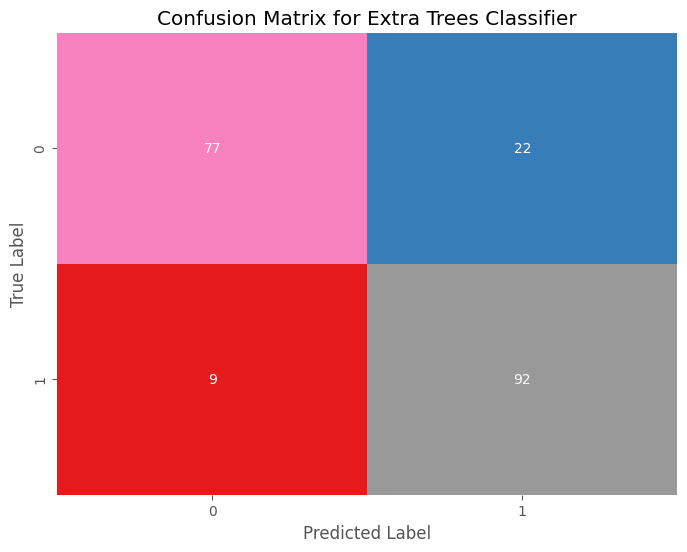

              precision    recall  f1-score   support

           0       0.90      0.78      0.83        99
           1       0.81      0.91      0.86       101

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



In [ ]:
et_conf_matrix = confusion_matrix(y_test, et_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(et_conf_matrix, annot=True, fmt="d", cmap='Set1', cbar=False)
plt.title('Confusion Matrix for Extra Trees Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print(classification_report(y_test, et_pred))

The False Positive (Type 1 error) was more prevalent, with 22 out of 200 total samples being incorrectly predicted to have diabetes when they do not actually have diabetes. This means that the model classified these 9 samples as diabetic when they are not (Type 2 error) , potentially leading to unnecessary concern or treatment for those individuals.

## **Learning Curve**

The Learning Curve is a graphical representation of how a model's performance changes as the size of the training dataset increases. By plotting the training and cross-validation scores against the number of training instances, it helps diagnose issues like overfitting or underfitting. A learning curve with a large gap between the training and cross-validation scores suggests overfitting, while a small gap indicates underfitting. Understanding the learning curve aids in optimizing the model's performance and generalization ability.

[0.735   0.76    0.77375 0.7975  0.79625 0.805   0.8075  0.81125 0.8275
 0.835  ]


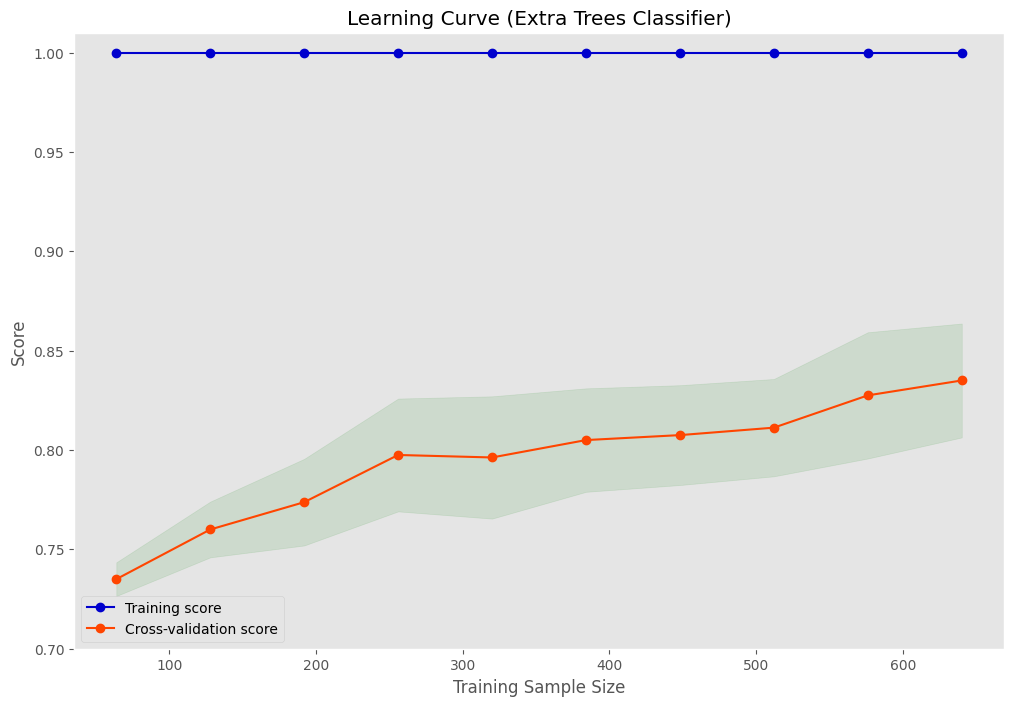

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 10)):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)

    plt.figure(figsize=(12,8))
    plt.title(title)
    plt.xlabel("Training Sample Size")
    plt.ylabel("Score")

    if ylim is not None:
        plt.ylim(*ylim)

    plt.grid()

    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="mediumblue",
             label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="orangered",
             label="Cross-validation score")
    print(np.mean(test_scores, axis=1))
    plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                     np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1, color="r")
    plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                     np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1, color="g")

    plt.legend(loc="best")
    plt.show()

plot_learning_curve(best_et_model, "Learning Curve (Extra Trees Classifier)", X_train, y_train, ylim=(0.7, 1.01), cv=5)

The increasing trend in cross-validation scores suggests that the model benefits from additional training instances, demonstrating improved predictive performance and generalization ability. This pattern indicates that the model is learning effectively from the data and can make more accurate predictions as the dataset size increases.

## **Cross Validation Score**

The cross-validation score evaluates the performance of an Extra Trees Classifier model using cross-validation, a technique for assessing model performance. The dataset is split into five subsets (folds), and the model is trained and tested on different combinations of these folds. The cross_val_score function from scikit-learn calculates the accuracy scores for each fold.

In [ ]:
cv_scores_et = cross_val_score(best_et_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores for Extra Trees Classifier:", cv_scores_et)
print("Mean Cross-validation score for Extra Trees Classifier:", cv_scores_et.mean())
print("Standard Deviation of Cross-validation scores for Extra Trees Classifier:", cv_scores_et.std())

Cross-validation scores for Extra Trees Classifier: [0.78125 0.85    0.85    0.83125 0.8625 ]
Mean Cross-validation score for Extra Trees Classifier: 0.835
Standard Deviation of Cross-validation scores for Extra Trees Classifier: 0.02866836235294929


## **ROC Curve**

The ROC curve helps visualize the trade-off between sensitivity and specificity. A perfect model would have an ROC curve that reaches the top left corner (100% sensitivity, 0% false positive rate), indicating perfect classification. The closer the curve is to the top left corner, the better the model's performance.
The Area Under the Curve (AUC) represents the overall performance of the model. It quantifies the area under the ROC curve, with a value between 0 and 1. A higher AUC indicates better model performance. An AUC of 0.5 suggests the model performs no better than random guessing, while an AUC of 1 indicates perfect classification.

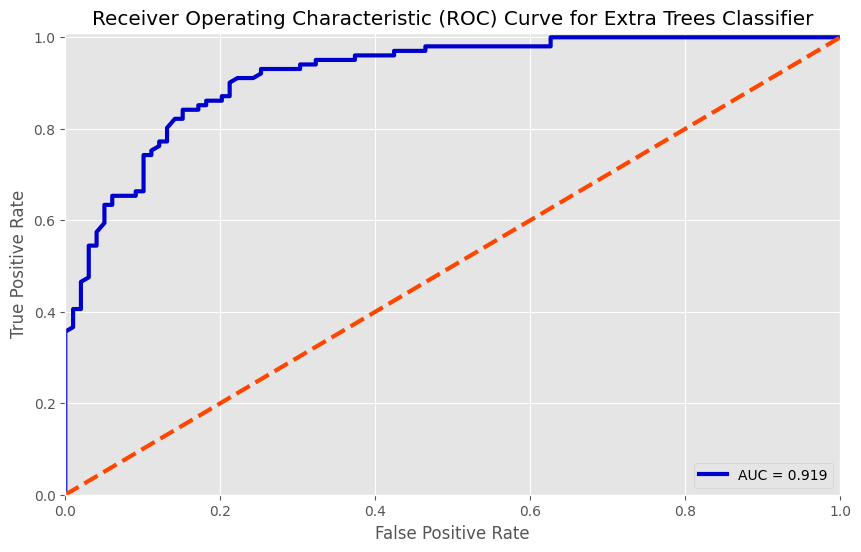

In [ ]:
et_probs = best_et_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, et_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='mediumblue', lw=3, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='orangered', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Extra Trees Classifier')
plt.legend(loc="lower right")
plt.show()

## **Feature Importance**

Feature importance quantifies the contribution of each feature to the model's predictions. This section calculates and visualizes feature importance scores for the Extra Trees Classifier model.

Feature Importance for Extra Trees Classifier:
                    Feature  Importance
4                   Insulin    0.089603
2             BloodPressure    0.094013
3             SkinThickness    0.095935
6  DiabetesPedigreeFunction    0.105031
0               Pregnancies    0.106134
7                       Age    0.140073
5                       BMI    0.144517
1                   Glucose    0.224694


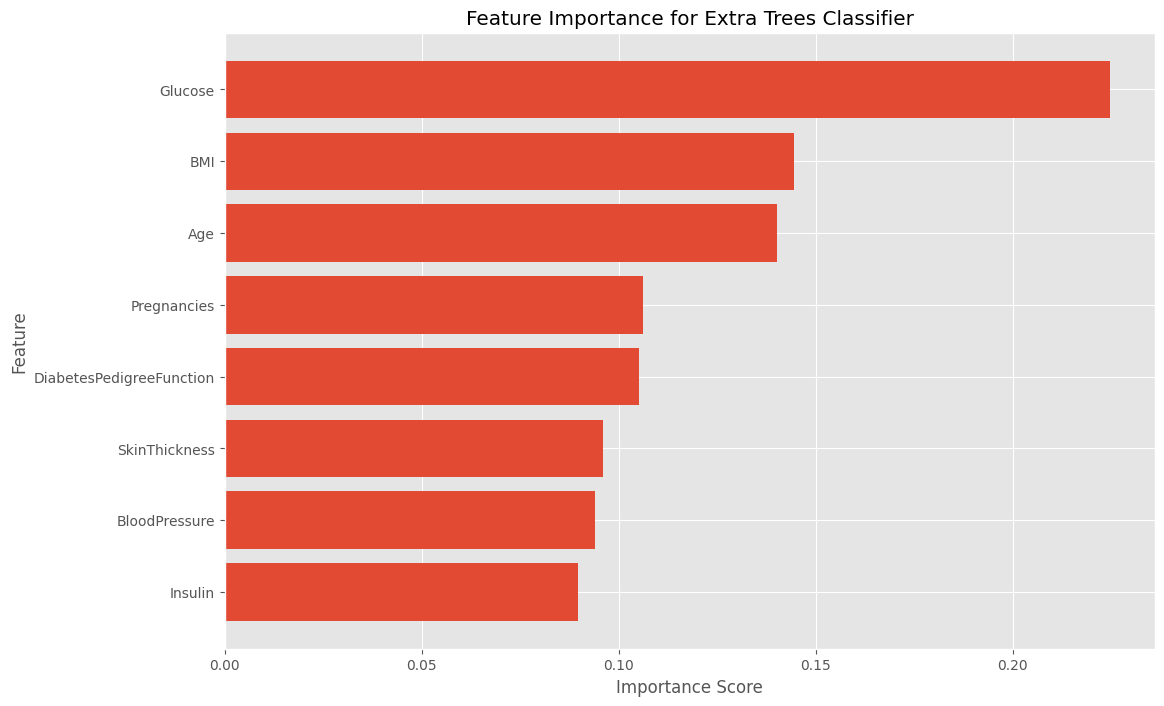

In [ ]:
feature_importances = best_et_model.feature_importances_

feature_importance_df = pd.DataFrame(
    {'Feature': X_train.columns, 'Importance': feature_importances}
)

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

print("Feature Importance for Extra Trees Classifier:")
print(feature_importance_df)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance for Extra Trees Classifier')
plt.show()

Glucose is the most crucial predictor, representing about 22.47% of the model's predictive power. BMI follows closely, contributing around 14.45% to the predictions, indicating its significant role in assessing diabetes risk.

On the other hand, Blood Pressure and Insulin have lower importance values, contributing about 9.40% and 8.96% respectively. While less influential than Glucose and Age, they still play notable roles in predicting diabetes risk.

# **Results**
**Extra Trees Performed the best.**

- **Accuracy (0.845):** This indicates the proportion of correctly classified instances out of the total instances. In this case, 84.5% of the instances were correctly classified by the Extra-Trees model. <br><br>
- **Recall (0.807):** Also known as sensitivity or true positive rate, recall measures the ability of the classifier to correctly identify positive instances (in this case, individuals with diabetes) out of all actual positive instances. A recall of 0.807 means that the model correctly identified 80.7% of all diabetic cases. <br><br>
- **Precision (0.9109):** Precision measures the proportion of true positive predictions out of all positive predictions made by the model. A precision of 0.9109 means that out of all instances the model classified as diabetic, 91.09% were actually diabetic. <br><br>
- **F1 Score (0.8558):** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, which is especially useful when the classes are imbalanced. A high F1 score (0.8558 in this case) indicates that the model has both good precision and recall. <br><br>

# **Conclusion**

Based on the comprehensive analysis conducted on the dataset provided by the National Institute of Diabetes and Digestive and Kidney Diseases, several key insights have emerged. Firstly, the exploratory data analysis highlighted significant differences in mean BMI and age between women with and without diabetes. This suggests that both age and BMI are critical factors in assessing diabetes risk, with individuals who are older and have higher BMI being more susceptible. Additionally, the correlation value revealed a relatively strong positive association between glucose levels and the presence of diabetes, indicating glucose as a pivotal predictor. Other features such as insulin, skin thickness, and diabetes pedigree function also showed moderate associations, although not as strong as glucose.
<br><br>
Furthermore, the performance comparison of various machine learning algorithms demonstrated that the Extra Trees Classifier yielded the highest accuracy among the models tested. This indicates that the Extra Trees Classifier is the most effective in predicting diabetes risk based on the provided dataset. Moreover, the feature importance analysis revealed that glucose and BMI are the most influential predictors, with glucose being the single most crucial feature. However, other features such as age, pregnancies, and diabetes pedigree function also significantly contribute to the predictive power of the model.
<br><br>
In conclusion, the findings from this project emphasize the importance of age, BMI, and glucose levels in predicting diabetes risk. The Extra Trees Classifier emerged as the best-performing model, providing valuable insights into feature importance. These results can be utilized to develop effective screening tools for identifying individuals at high risk of diabetes, enabling timely interventions and preventive measures. By leveraging machine learning techniques and comprehensive analysis of relevant features, healthcare professionals can enhance their ability to better identify whether a person is diabetic or not.
